In [1]:
#Imports
import sys
sys.path.append('../python/')
import NGC5533_functions as nf

import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
import lmfit as lm
import dataPython as dp

from datetime import datetime
import time as t

In [2]:
starttime = t.time()

data = dp.getXYdata_wXYerr('../fitting/data/100kpc_data.txt')
r_dat = np.asarray(data['xx'])
v_dat = np.asarray(data['yy'])
v_err0 = np.asarray(data['ex'])
v_err1 = np.asarray(data['ey'])

#change r_dat so it's strictly increasing
r_dat, v_dat, v_err0, v_err1 = (list(a) for a in zip(*sorted(zip(r_dat, v_dat, v_err0, v_err1))))
#converting v_err1 to an array
v_err1 = np.asarray(v_err1)
#Express as weights
weighdata = 1/v_err1

In [3]:
#keeping others but holding them constant
def f(r,M):
    return np.sqrt(nf.bh_v(r,M,load=True,path='../fitting')**2 
                   + nf.h_v(r,load=True,path='../fitting')**2 
                   + nf.b_v(r,load=True,path='../fitting')**2 
                   + nf.d_v(r,load=True,path='../fitting')**2)
#Only Black Hole
def bh(r,M):
    return nf.bh_v(r,M,load=True,path='../fitting')

In [4]:
#Fit, Keeping rest constant

#Setup
l_mod = lm.Model(f)
l_params = l_mod.make_params()
#Black Hole Params
l_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Do fit
l_fit = l_mod.fit(v_dat,l_params,r=r_dat,weights=weighdata)

In [5]:
#Fit, BH Only

#Setup
bh_mod = lm.Model(bh)
bh_params = l_mod.make_params()
#Black Hole Params
bh_params.add('M', value=nf.Mbh_def, min=0) #Mass
#Do fit
bh_fit = bh_mod.fit(v_dat,bh_params,r=r_dat,weights=weighdata)

In [6]:
#Misc. Variables for plotting
l_dict = l_fit.best_values 
l_M = l_dict['M']
bh_dict = bh_fit.best_values 
bh_M = bh_dict['M']
lMerr = l_fit.params['M'].stderr

#unceranties on fit. (naming convention from tutorial I found)
dely = l_fit.eval_uncertainty()
delbh = bh_fit.eval_uncertainty()

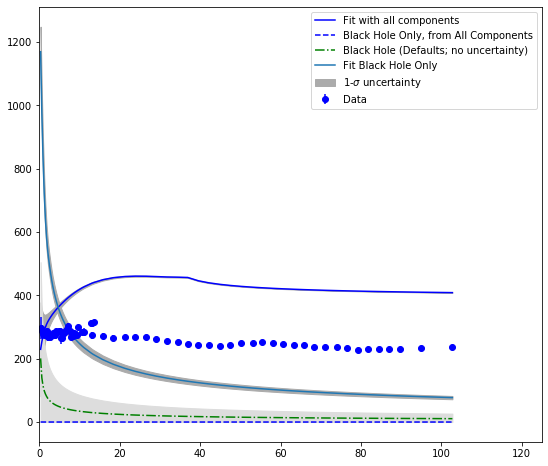

In [7]:
fig = plt.figure(figsize=(9.0,8.0))
plt.xlim(0,125)

#Data
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
#All-Components Fit
plt.plot(r_dat,l_fit.best_fit,'b-',label='Fit with all components')
plt.fill_between(r_dat,l_fit.best_fit-dely, l_fit.best_fit+dely, color='#ABABAB',label='1-$\sigma$ uncertainty')
plt.plot(r_dat,nf.bh_v(r_dat,l_M,load=True,path='../fitting'),'b--',label='Black Hole Only, from All Components')
plt.fill_between(r_dat,nf.bh_v(r_dat,max(l_M-lMerr,0)), nf.bh_v(r_dat,(l_M+lMerr)), color='#dddddd')
#^ Line above will fail for undefined values, i.e. M < 0. This is reason for max(m,0).
#Defaults
plt.plot(r_dat,nf.bh_v(r_dat,load=True,path='../fitting'),'g-.',label='Black Hole (Defaults; no uncertainty)')
#BH Only
plt.plot(r_dat,bh_fit.best_fit,label='Fit Black Hole Only')
plt.fill_between(r_dat,bh_fit.best_fit-delbh, bh_fit.best_fit+delbh, color='#ABABAB')

plt.legend()
plt.show()

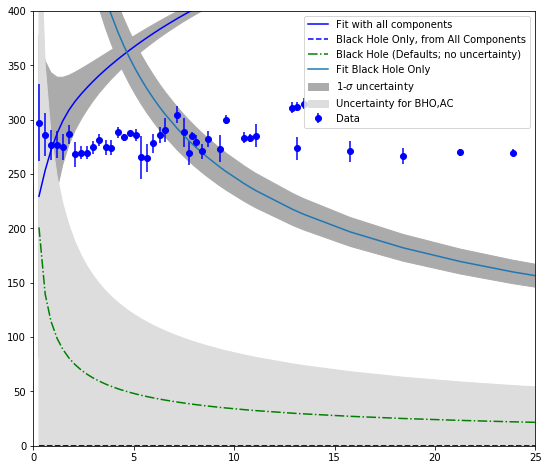

In [8]:
#Same plot, but zoomed in
fig = plt.figure(figsize=(9.0,8.0))
plt.xlim(0,25)
plt.ylim(0,400)

#Data
plt.errorbar(r_dat,v_dat,yerr=v_err1,fmt='bo',label='Data')
#All-Components Fit
plt.plot(r_dat,l_fit.best_fit,'b-',label='Fit with all components')
plt.fill_between(r_dat,l_fit.best_fit-dely, l_fit.best_fit+dely, color='#ABABAB',label='1-$\sigma$ uncertainty')
plt.plot(r_dat,nf.bh_v(r_dat,l_M,load=True,path='../fitting'),'b--',label='Black Hole Only, from All Components')
plt.fill_between(r_dat,nf.bh_v(r_dat,max(l_M-lMerr,0)), nf.bh_v(r_dat,(l_M+lMerr)), color='#DDDDDD',label='Uncertainty for BHO,AC')
#^ Line above will fail for undefined values, i.e. M < 0. This is reason for max(m,0).
#Defaults
plt.plot(r_dat,nf.bh_v(r_dat,load=True,path='../fitting'),'g-.',label='Black Hole (Defaults; no uncertainty)')
#BH Only
plt.plot(r_dat,bh_fit.best_fit,label='Fit Black Hole Only')
plt.fill_between(r_dat,bh_fit.best_fit-delbh, bh_fit.best_fit+delbh, color='#ABABAB')

plt.legend()
plt.show()

In [9]:
print('Fit information for all-component fit:')
l_fit

Fit information for all-component fit:


In [10]:
print('Fit information for single-component fit:')
bh_fit

Fit information for single-component fit:


In [11]:
endtime = t.time()
print('Total Time:')
print(str(endtime - starttime)+' seconds')
print('')

print('Timestamp:')
print(datetime.now())

Total Time:
8.531651020050049 seconds

Timestamp:
2019-10-24 08:52:13.263599


In [20]:
d4 = bh_fit.eval_uncertainty(sigma=4)

In [21]:
print(delbh)

[78.97700017 65.93496644 56.52331839 48.7858957  43.46304789 39.3024376
 36.27499535 34.04959111 32.29593917 30.57575626 29.20894592 27.74545838
 26.80066166 25.73386395 24.87298331 24.09859238 23.36295177 22.75693896
 22.15731329 21.586404   21.05522029 20.57949447 19.70194288 19.28973834
 18.94474927 18.80615109 18.56994638 18.22532852 17.91525578 17.32306103
 17.04830034 16.29122285 16.06691837 15.86041671 14.70325897 14.5662995
 14.5573802  14.37806712 13.28968988 12.30681131 11.45646994 10.80604519
 10.24695988  9.78850277  9.37376855  8.99630659  8.69138036  8.39251291
  8.13479136  7.8766788   7.65887029  7.4516992   7.24873161  7.09442125
  6.92900629  6.77953383  6.63926938  6.50520752  6.38310917  6.26176987
  6.13632153  6.03687391  5.93075216  5.83918655  5.7458807   5.661093
  5.57593634  5.41529305  5.20767029]


In [22]:
print(d4)

[334.31810659 279.10977993 239.26926499 206.51592544 183.98374014
 166.37143084 153.55594331 144.13556867 136.71217203 129.4304534
 123.64459875 117.44949911 113.45007336 108.9342043  105.29000426
 102.01192446  98.8978789   96.33256175  93.79428203  91.37756179
  89.12900423  87.11520581  83.40043587  81.6555299   80.1951542
  79.60845325  78.60857338  77.14976903  75.83719789  73.33037404
  72.16728259  68.96249243  68.01298754  67.13884389  62.24047113
  61.66070703  61.62295066  60.86389918  56.25668169  52.09605133
  48.49646516  45.74314749  43.37647944  41.43578135  39.68016697
  38.08233005  36.79154461  35.52640666  34.43544371  33.34282557
  32.42081883  31.5438414   30.68465783  30.03144554  29.33122629
  28.69849332  28.10473888  27.53724067  27.02038526  26.50674301
  25.97570675  25.55473428  25.10550956  24.71790251  24.32292885
  23.96401342  23.60353615  22.92351589  22.04462648]


In [23]:
d4/delbh

array([4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718, 4.23310718,
       4.23310718, 4.23310718, 4.23310718, 4.23310718])